In [3]:
import qiskit as q
%matplotlib inline

#quantum circuit 
circuit = q.QuantumCircuit(2,2) #2 qubits, 2 classic bits
circuit.x(0) 
circuit.cx(0,1) #cnot: controlled not, Flips 2nd qubit value if first cubit is 1
circuit.measure([0,1],[0,1]) #translating qubit result to classic bit
circuit.draw()


In [0]:
from qiskit import IBMQ
IBMQ.save_account('0ee807ee347083992d6beb4b5ee1b510f0a708a4af570597c04b59f7df34e3f5d3829806e43462515f6323f25875fc87c978fa1736e8a420b80ea62355e23269')

In [5]:
IBMQ.load_account()

/usr/local/lib/python3.6/dist-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
  try:
      qubit_count = len(backend.properties().qubits)
  except:
      qubit_count= "simulated"

  print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits.")


ibmq_qasm_simulator has 0 queued and simulated qubits.
ibmqx2 has 3 queued and 5 qubits.
ibmq_16_melbourne has 0 queued and 15 qubits.
ibmq_vigo has 7 queued and 5 qubits.
ibmq_ourense has 5 queued and 5 qubits.
ibmq_london has 1925 queued and 5 qubits.
ibmq_burlington has 0 queued and 5 qubits.
ibmq_essex has 8 queued and 5 qubits.
ibmq_armonk has 0 queued and 1 qubits.


In [7]:
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend("ibmq_16_melbourne")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


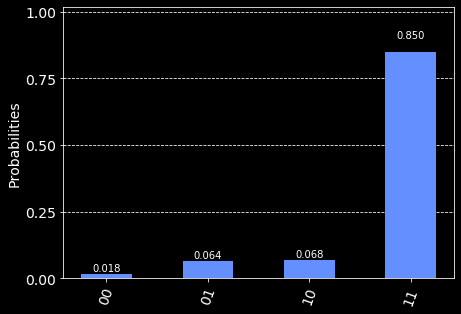

In [10]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])